In [1]:
%run ../../common/import_all.py

from common.setup_notebook import set_css_style
set_css_style()

# On functions and their things

## Big O and little O notation

The *big O* notation is used in mathematics to signify the limiting behaviour of a function when it goes to $\infty$:

$$
\lim_{x \to \infty} f
$$

The letter "O" is used as per *order of function*.

Note that in computer science, the big O notation is used to classify algorithms by how they respond to changes in the input size.

The *little O* notation instead,

$$
f(x) = o(g(x)) \ ,
$$

means that $g(x)$ grows much faster than $f(x)$.

## Convolution

The mathematical convolution of functions is the operation
$$
(f \star g)(x) =  \int_{-\infty}^{+\infty} dy f(y) g(x - y)
$$

It is a symmetric operation. In fact, 

$$
(g \star f)(x)  = \int_{-\infty}^{+\infty} dy g(y)f(x-y) \ ,
$$

using $z = x-y$, so that $dy = -dz$, then

$$
(g \star f)(x) = -\int_{+\infty}^{-\infty} dz g(x-z)f(z) =\int_{-\infty}^{+\infty} dz  g(x-z)f(z)
$$

## Some functions of common use in Machine Learning/Statistics

### Heaviside step

The Heaviside step function is of common use in lots of applications. It is just a simple step:

$$
f(x) = 
\begin{cases}
1 \text{ if } x  \geq 0 \\
0 \text{ if } x < 0
\end{cases}
$$

### Softmax

The softmax is a normlised exponential used in probability theory as a generalisation of the logistic function. What it does is transforming a $K$-dimensional vector $\mathbf{x}$ of arbitrary real values into a vector of the same size with elements which are still real numbers but ranging in the interval $[0,1]$ and such that their sum equals 1 (so they can represent probabilities). The function has the form

$$
f(x_i) = \frac{e^{x_i}}{\sum_{j \in K} e^{x_j}}
$$

The softmax is also often employed in the context of neural networks. It is called this way because it represents a softening of the max function in the sense that it is larger on the max of the array. See the example.

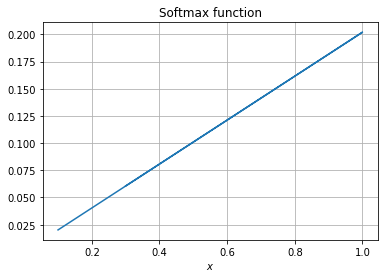

([0.1, 0.2, 1, 0.3],
 [0.020189651799465542,
  0.040379303598931084,
  0.20189651799465541,
  0.060568955398396622])

In [12]:
def softmax(x, index):
    return x[index] / np.exp(np.sum(x))

x = [0.1, 0.2, 1, 0.3]
y = [softmax(x, index=i) for i in range(len(x))]

plt.plot(x, y)
plt.title('Softmax function')
plt.xlabel('$x$')
plt.grid()
plt.show();

x, y

### Logit and logistic functions

Given a probability $p$, the odds are defined as $o = \frac{p}{1-p}$. The *logit* function is the logarithm of the odds:

$$
L(p) = \ln{\frac{p}{1-p}}
$$

A negative logit is for $p < 0.5$.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


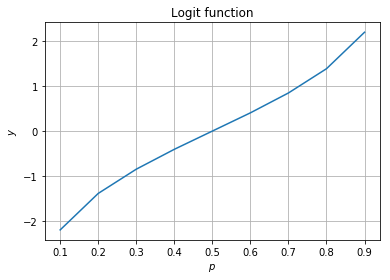

In [12]:
p = np.arange(0.1, 1.1, 0.1)
y = np.log(p/(1-p))

plt.plot(p, y)
plt.grid()
plt.title('Logit function')
plt.ylabel('$y$')
plt.xlabel('$p$')
plt.show();

Now, the probability expressed as a function of the logit creates the *logistic* function:

$$
L = \ln{\frac{p}{1-p}} \Leftrightarrow -L = \ln{\frac{1}{p} - 1} \Leftrightarrow \frac{1}{p} = 1 + e^{-L} \Leftrightarrow p = \frac{1}{1+e^{-L}}
$$

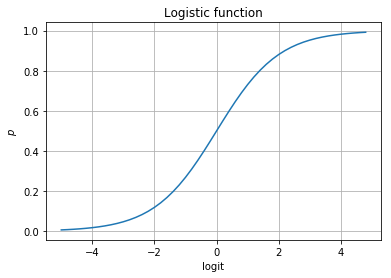

In [18]:
L = np.arange(-5, 5, 0.2)
p = 1/(1 + np.exp(-L))

plt.plot(L, p)
plt.grid()
plt.title('Logistic function')
plt.xlabel('logit')
plt.ylabel('$p$')
plt.show();